# Laborator - Comunicație prin placa de sunet (abordare empirică)

<p> <strong> Obiective: </strong> În general, ne vom propunem să transmitem un mesaj (binar) de la un calculator (sursă/emițător) la altul (destinație) de o maniera cât mai eficientă, iar, apoi, destinatarul să confirme sursei primirea cu succes a respectivului mesaj. Pentru acest laborator ne vom rezuma sa trimitem la alt calculator un simplu șir de biti prin intermediul semnalelor din spectrul audio (20 - 22000 Hz). </p>
<br>
<ol> <strong> Procedura de lucru: </strong> 
<li> Va veți asigura că aveți o platformă funcțională. </li>
<li> Veți genera semnale pe portul audio. </li>
    <li> <strike> Le veți vizualiza pe osciloscop (cu ajutorul cablului aferent). </strike></li>
<li> Le veți achizitiona (captura/înregistra) prin portul audio. </li>
<li> Veți căuta/propune (și implementa) o metodă de a reprezenta șirul de biți printr-un semnal audio (banda 20Hz-22Khz). </li>
<li> Veți căuta/propune (și implementa) o metodă de a „recupera” șirul de biți din reprezentarea de la punctul anterior. </li>
<li> Veți realiza un program (scurt) care să primeasca drept parametri un șir de biți ce urmează a fi trimis, și îl va trimite pe portul audio folosind metoda propusă. </li>
<li> Veti realiza un program care înregsitrează portul audio și care, apoi, prelucrează semnalul înregsitrat astfel încât să recupereze posibilii biți care au generat respectivul semnal. </li>
<li>  <strike> Veți încerca să comunicați cu colegii din apropiere prin conectarea cablurilor audio între calculatoare.</strike> </li>
</ol>
<br>
<p> <strike> <strong> Notă: </strong> Recordul de viteză de transmisie va fi premiat printr-un punctaj suplimentar. Recordul se va găsi pe Moodle. Egalarea recordului nu se puncteaza suplimentar. Evauarea se va face la sfarsitul fiecărui laborator. Dacă vor fi mai multe echipe care obțin același timp record, punctajul se va impârți între echipe.</strike></p>

<p> <strong> Adaptare la noile „vremuri”: </strong> Se va lucra în echipe de maxim 3 persoane. Pe Moodle se va încărca un singur referat de echipă (în format pdf), care va conține numele tuturor membrilor echipei și în care se vor prezenta acțiunile întreprinse în sensul transmiterii unor date binare prin intermediul plăcii de sunet (idei, metode, cod, probleme înâmpinate sau posibile etc.). Se vor prezenta rezultatele obținute. Modelul de prezentare ar trebui să fie acela care să permită reproducerea experimentelor efectuate de echipă pentru obținerea rezultatelor propuse (eventual se vor atașa chair și sursele, dar în cazul fișierelor „ipynb” rugămintea ar fi să ștergeți ieșirile pentru a nu ocupa un spațiu mare, i.e. Kernel -> Restart & Clear Output). Referatul trebuie să conțină fraza următoare:   </p> 


<strong>  „Activitatea și rezultatele prezentate în acest referat sunt originale și au fost realizate exclusiv de autorii referatului! De asemnea, am luat la cunoștință că în cazul în care se va dovedi că ne-am însușit munca altor persoane, nu vom mai putea promova laboratorului de TD, deci nici disciplina TD.” </strong>

# # Studenți:
# Bălan Silvia 333AB
# Necula Leonard-Gabriel 334AB
# Rădăcină Andreea-Cristina 333AB

<strong> Spor la treaba! </strong>
<br>
<p> Testam ca functioneaza comenzile Python </p>

In [ ]:
print("Test!")

Se verifica daca este instalata biblioteca pentru lucrul cu placa de sunet.

In [3]:
import sounddevice as sd

Daca rularea liniei de mai sus va generara eroare, atunci, cel mai probabil, trebuie instalat python-sounddevice. Detalii <a href= "https://python-sounddevice.readthedocs.io/en/0.3.10/"> aici</a>.


Verificam si modulele de Python care ne permit lucrul intr-un mod asemanator cu cel din Matlab (numpy si matplotlib).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

In [4]:
# functia magica pentru a putea interactiona dinamic cu desenele (inclusiv zoom)
%matplotlib notebook 
# Atentie! Dupa fiecare reprezentare cu plt.show, va trebui inchisa optiunea de interactiune dinamica pentru ca,
# altfel, va suprapune reprezentarile. O alta varianta pentru a nu reprezenta un grafic intr-o fereastra nedorita
# consta in folosirea functiei figure()

<p> Daca lucrurile au mers bine pana aici atunci putem face si o scurta demonstratie. Ne propunem in continuare sa generam cateva sunete prin care sa emulam semnalele pe care le-am putea transmite radio.</p> 
<br>

<IPython.core.display.Javascript object>


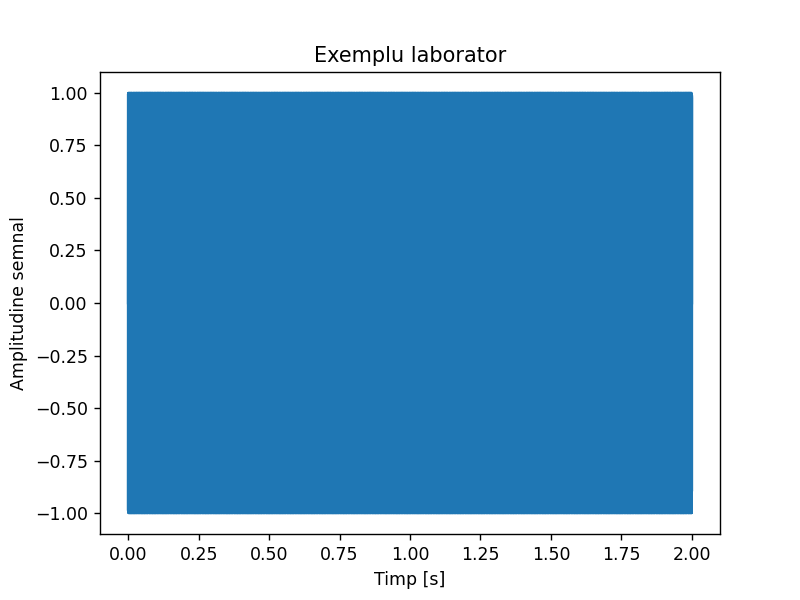

In [19]:
# Vom genera o sinusoida (un ton) cu o frecventa de 1000Hz
fa = 16000 # frecventa analogica in [Hz]

# Cum discutam de un semnal discret, va trebui sa transpunem aceasta frecventa intr-una discreta corespunzatoare
# Vom considera frecventa de esantionare de 44.1KHz (oare de ce?)
# In general un om percepe sunete din plaja de frecvente 20 - 22kHz
fe = 44100 #[Hz]
# De aici rezulta imediat perioada de esantionare
Te = 1/fe #[s] 


# Sa zicem ca ne-ar interesa un interval de timp de 10s
T = 2 #[s]

# In total ar fi un numar de esantione egal cu:
Ne = T*fe

# Esantioanele noastre de timp vor fi:
t = np.linspace(0, T, Ne)
# O alta variant de a genera vectorul de esantioane al timpului este cu ajutorul lui arange
# t= np.arange(0,T,Te)

# Sa generam tonul nostru (armonica)
s = np.sin(2*fa*np.pi*t) # i.e. sin(wt) sau sin(2*pi*f*t)



# Sa-l ilustram grafic
plt.figure()
plt.plot(t,s)
plt.show()
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine semnal')
plt.title('Exemplu laborator')
plt.savefig('Grafic_laborator.png')

<p> In continuare vom reda sunetul la iesirea audio. Documentatia fuctiilor modulului sounddevice se poate consulta <a href= "https://python-sounddevice.readthedocs.io/en/0.3.10/"> aici</a>. De asemenea, dupa ce tastati "sd." puteti apasa tasata [Tab] sa aveti acces la meniul contextual.</p>

In [ ]:
sd.play(s,fe)

<p> Pentru a vizualiza pe osciloscop rezultatul va trebui sa conectati iesirea cablului audio (jack-ul de 3.5mm) la osicloscop. Din cele 3 segmente ale jack-ului, cel mai extrem este reprezinta un canal, cel de la mijloc al doilea canal, iar cel de la baza este masa semnalului. </p>
<br>
<p> Exista posibilitatea de a inregistra un semnal de la microfon (in cazul nostru de la jack-ul corespunzator microfonului). Exemplul de mai jos este auto explicativ. Trebuie avut grija fiind ca este posibil ca inregistrarea in acest mod sa intrerupa redarea pornita anterior. Pentru redare simultan cu inregistrare se va folosi functia <a href="https://python-sounddevice.readthedocs.io/en/0.3.10/#simultaneous-playback-and-recording"> playrec</a>.</p>


In [20]:
#durata=2 #durata de inregsitrare [s]
#inRec=sd.rec(int(durata * fe), samplerate=fe, channels=2)
#sd.wait()
rec = sd.playrec(s,fe, channels=2)


<p> Redam ceea ce am inregistrat </p>

In [ ]:
sd.play(rec,fe)
sd.wait()

<p> În acests moment ar trebui să aveți cam tot ce vă trebuie pentru a porni la rezolvarea laboratorului. </p>

<h3> Puțin „ajutor”... </h3>
<br>
<p> Să reprezentăm grafic cele două canale înregistrate... </p>

<IPython.core.display.Javascript object>


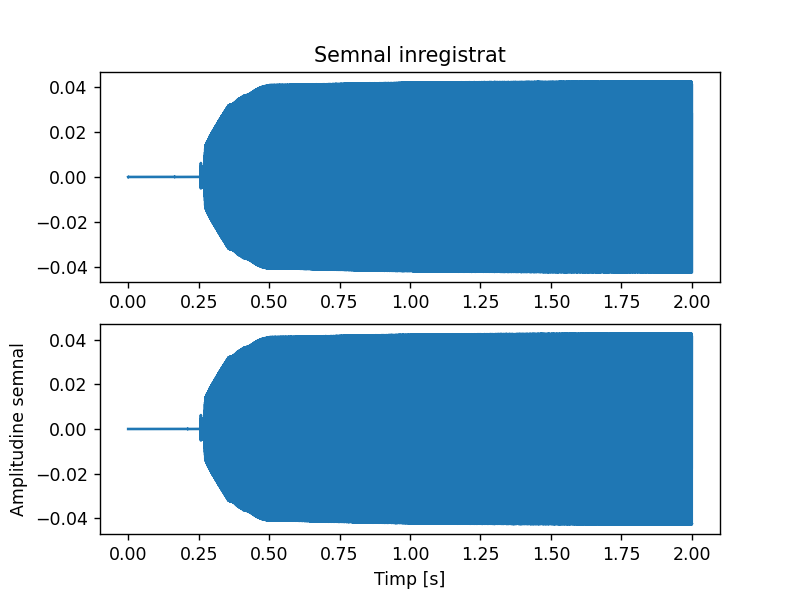

In [21]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Semnal inregistrat')
plt.plot(t,rec[:,0])
plt.subplot(2, 1, 2)
plt.plot(t,rec[:,1])
plt.show()
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine semnal')

plt.savefig('Semnal_inregistrat.png')

In [4]:
#####
    # Codificarea se face folosind praguri diferite pentru semnalul trimis prin placa de sunet
    # pentru un bit de 0 se trimite un semnal cu amplitudinea de 0.5, iar pentru un bit de 1
    # un semnal cu amplitudinea de 1
#####
def codeBits(bits, duration, Fp = 20000):
    
    Fs = 44100; # Hz
    # Fp = 20000 Hz -> frecventa purtatoare
    
    # Perioada semnalului trimis
    T = 1/Fp; # Neutilizat
    
    # Numarul de esantioane pentru durata duration
    Ne = int(Fs * duration);
    # Generare orizont temporal pentru durata duration
    t = np.linspace(0, duration, Ne)
    
    # Timpul total
    total_time = duration * len(bits)
    # Sample-urile temporale
    total_time_samples = np.linspace(0, total_time, int(Fs * total_time))
    
    
    # Parcurgem sirul de biti
    returned_signal = np.array([])
    
    for bit in bits:  
        
      
        if bit == '0':
            returned_signal = np.concatenate((returned_signal,  0.5 * np.sin(2*np.pi * Fp * t)))
        elif bit == '1':
            returned_signal = np.concatenate((returned_signal,  np.sin(2*np.pi * Fp * t)))
        
    
    return returned_signal, total_time_samples
    
    

In [5]:
#####
    # Decodificare se face folosind pragurile t_high si t_low, daca semnalul este in amplitudine
    # maxima mai mare decat t_high atunci bit-ul este presupus a fi 1, daca este mai mic de 
    # t_low este presupus a fi 0, daca este intre cele 2 praguri il ignoram.
    # Pentru reducerea zonei de ignorare a semnalului pe o anumita perioada se pot
    # seta t_high = t_low
#####
def decodeBits(signal, duration, Fp = 20000, t_high = 0.75, t_low = 0.5):
    
    Fs = 44100; # Hz
    # Fp = 20000  Hz -> frecventa purtatoare
    
    start = 0;
    end = int(Fs * duration);
    
    # Numar de esantioane semnal
    Ne = np.prod(signal.shape)
    
    # Numarul de biti
    n_p = Ne// int(Fs * duration);
    
    bits = []
    
    for i in range(0, n_p):
        
        max_value = np.max(signal[start:end])
        
        if max_value > t_high:
            bits.append('1')
        elif max_value < t_low:
            bits.append('0')
        
        start = end;
        end = end + int(Fs * duration);
        
    return "".join([bit for bit in bits])
    




In [6]:
#####
    # Se codifica fiecare bit din semnal pe o durata determinata de parametrul
    # duration, iar codificarea se face astfel: cu frecventa Fp_l bitii 0
    # iar cu frecventa Fp_h bitii de 1
#####
def codeBits2Freq(bits, duration, Fp_l = 20000, Fp_h = 22000):
    
    Fs = 44100; # Hz
  
    
    # Numarul de esantioane pentru durata duration
    Ne = int(Fs * duration);
    # Generare orizont temporal pentru durata duration
    t = np.linspace(0, duration, Ne)
    
    # Timpul total
    total_time = duration * len(bits)
    # Sample-urile temporale
    total_time_samples = np.linspace(0, total_time, Ne * len(bits))
    
    
    # Parcurgem sirul de biti
    returned_signal = np.array([])
    
    for bit in bits:  
        
      
        if bit == '0':
            returned_signal = np.concatenate((returned_signal,  np.sin(2*np.pi * Fp_l * t)))
        elif bit == '1':
            returned_signal = np.concatenate((returned_signal,  np.sin(2*np.pi * Fp_h * t)))
        
    
    return returned_signal, total_time_samples

In [7]:
#####
    # Se codifica fiecare bit din semnal pe o durata determinata de parametrul
    # duration, iar codificarea se face astfel: cu frecventa Fp_l bitii 0
    # iar cu frecventa Fp_h bitii de 1. De asemenea se adauga in acest caz si
    # un header pentru a contracara cumva timpul mort al placii de sunet
#####
def codeBits2FreqWithDeadTime(bits, duration, Fp_l = 20000, Fp_h = 22000, dead_time = 0.5):
    
    Fs = 44100; # Hz
  
    
    # Numarul de esantioane pentru durata duration
    Ne = int(Fs * duration);
    # Generare orizont temporal pentru durata duration
    t = np.linspace(0, duration, Ne)
    
    # Timpul total
    total_time = duration * len(bits) + dead_time 
    # Sample-urile temporale
    total_time_samples = np.linspace(0, total_time, Ne * len(bits) +  int(dead_time * Fs))
    
    
    # Parcurgem sirul de biti
    returned_signal = np.array([])
    
    if dead_time != 0:
        returned_signal = np.concatenate((returned_signal, np.linspace(0, 0, int(Fs * dead_time))))
        
    for bit in bits:  
        
      
        if bit == '0':
            returned_signal = np.concatenate((returned_signal,  np.sin(2*np.pi * Fp_l * t)))
        elif bit == '1':
            returned_signal = np.concatenate((returned_signal,  np.sin(2*np.pi * Fp_h * t)))
        
    
    return returned_signal, total_time_samples

In [8]:
#####
    # Decodificarea se face aplicand FFT pe fiecare durata din semnal egala cu 
    # parametrul duration, iar mai apoi alegerea bitului se face prin apropierea
    # maximului din spectru de catre frecventa pentru 0 sau 1
#####
def decodeBitsFromFreq(signal, duration, Fp_l = 20000, Fp_h = 22000):
    
    Fs = 44100; # Hz   
    Smp = int(Fs * duration)
    Ne = np.prod(signal.shape)
    N = np.max([Smp, 400]); # Ne dorim sa avem macar 1000 de esantioane pentru a avea o reprezentare mai fin esantionata
                             # mai buna, desi "bordarea" cu 0 duce la pierderea preciziei de localizare
    n_p = Ne//Smp # Numarul de biti transmisi
    f = np.linspace(0, Fs//2, N//2) # Range-ul de frecvente gasit in FFT
    print('Dimensiune = {}'.format(Smp))
    bits = []
    for x in range(0, n_p):
        
        x_fft = sci.fft.fft(signal[x * Smp: (x + 1) * Smp], n = N)
        x_fft_abs = np.absolute(x_fft[0:N//2])
        
        pos = np.where( x_fft_abs == np.max(x_fft_abs)) # Pozitia la care se afla maximul in spectru
        try:
            pos = pos[0][0]
        except:
            try:
                pos = pos[0]
            except:
                pos = 0
    
        f_at_max = f[pos]
        
        if np.abs(Fp_l - f_at_max) < np.abs(Fp_h - f_at_max):
            bits.append('0')
        else:
            bits.append('1')
        
    return "".join([x for x in bits])
    

In [9]:
#####
    # Calcularea erorii dintre 2 siruri de biti, eroarea este in 
    # procente relativ la cel mai lung sir de biti
#####
def computeError(initialBits, resultedBits):
    
    errorCount = 0
    leng = max(len(initialBits), len(resultedBits))
    for i in range(0, leng):
        try:
            if initialBits[i] != resultedBits[i]:
                errorCount += 1;
        except:
            errorCount += 1;
    return 1.0 * errorCount / leng * 100
    

In [10]:
#####
    # Eliminarea timpului mort din cadrul unui semnal
#####
def removeDeadTime(signal, error = 1e-4):
    

    try:
        # Identificare index pana la care raspunsul este apoximativ 0 (adica timp mort)
        pos = np.where(signal > error) # Presupunem ca daca semnalul depaseste error a trecut timpul mort
        pos = int(pos[0][0])
        # Vom scoate primele pos componente si vom completa semnalul la final, cu esantioanele
        # final - pos -> final 
        
        signal = signal[pos:]
        size = np.prod(signal.shape)
        if pos < size:
            signal = np.concatenate((signal, signal[size - pos:size]))
        else:
            aux_signal = signal
            while(pos > size):
                signal = np.concatenate((signal, aux_signal))
                pos -= size
            signal = np.concatenate((signal, aux_signal[size - pos:size]))
    except:
        print('error removeDeadTime')
    
    return signal
    

In [11]:
#####
    # Eliminarea header-ului 
#####
def removeHeader(signal, header_duration = 0.5, Fs = 44100):
    
    # Eliminare esantioane din header
    try:
        header_ending = int(Fs * header_duration)
        signal  = signal[header_ending:]
    except:
        pass
    return signal

In [12]:
#####
    # Afisarea semnalului inregistrat, cu doua canale
#####
def showRecordedSignal(recorded_signal_2_channels, t, xlabel = 'Timp [s]', ylabel = 'Amplitudine semnal',
                       title = 'Semnale inregistrate'):
    # Afisare semnale inregistrate
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(t, recorded_signal_2_channels[:, 0])
    plt.subplot(2, 1, 2)
    plt.plot(t, recorded_signal_2_channels[:, 1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [13]:
# Testare functie de calculare a erorii

print('Eroarea este {} %'.format(computeError('11101', '11001011')))

Eroarea este 50.0 %


In [14]:
# Codificare si decodificare "exacta" - fara trecerea prin placa de sunet
bits_to_send = "0101001"
duration = 0.5 # Cu cat este mai mica cu atat avem o viteza de transfer mai mare
# durata este in stransa legatura cu perioada semnalului trimis durata_min = T
x,t = codeBits(bits_to_send, duration)
bits_decoded = decodeBits(x, duration)
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))

Eroarea este 0.0 %


In [15]:
# Inregistrarea semnalului trimis prin placa de sunet si
# codificat anterior
rec = sd.playrec(x, 44100, channels=2) # inregistrare semnal generat anterior



<IPython.core.display.Javascript object>


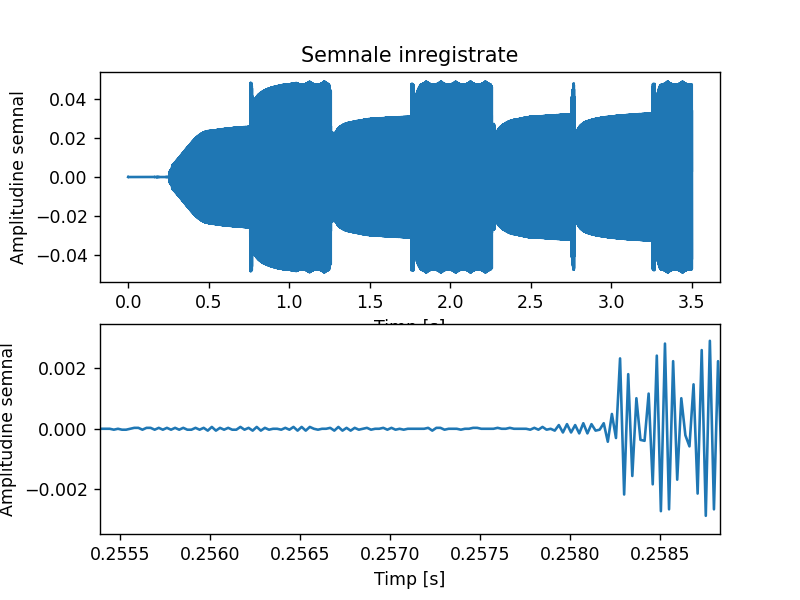

In [63]:
# Afisare semnale inregistrate, recomandarea este ca setarea pragurilor
# sa se faca pe baza datelor de pe aceste grafice
showRecordedSignal(rec, t)

In [64]:
channel_decoded = 0 # Canalul de pe care decodificam datele {0 sau 1 in functie de 
                    # daca setam channels = 2}
# Valorile de mai jos se aleg in functie de graficul de mai sus
t_high = 0.035
t_low  = 0.035
Fp = 20000
bits_decoded = decodeBits(rec[:, channel_decoded], duration, Fp, t_high, t_low)
print('Biti trimisi:      {}\nBiti decodificati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))

Biti trimisi:      0101001
Biti decodificati: 0111111
Eroarea este 42.857142857142854 %


<IPython.core.display.Javascript object>


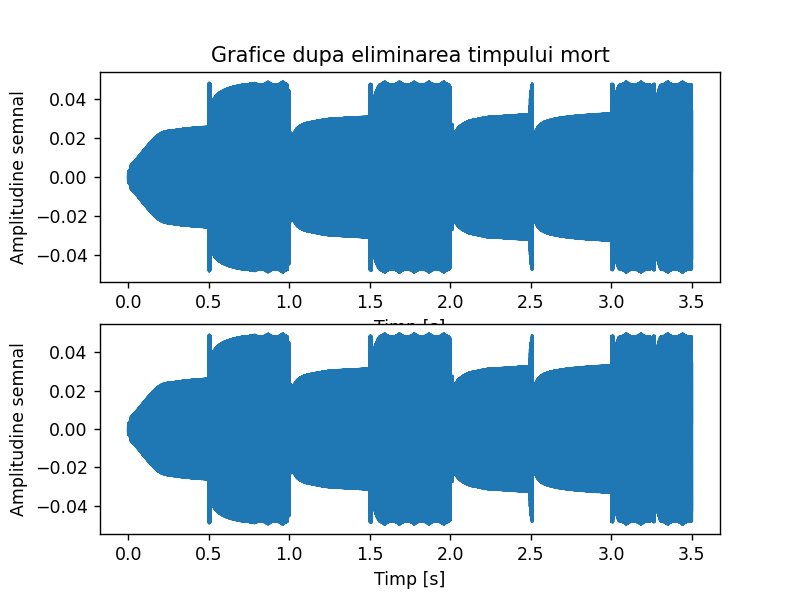

In [65]:
# Eliminare timp mort
rec_copy = rec;
error = 1e-4
rec_copy[:, 0] = removeDeadTime(rec[:, 0], error)
rec_copy[:, 1] = removeDeadTime(rec[:, 1], error)
showRecordedSignal(rec_copy, t,'Timp [s]', 'Amplitudine semnal', 'Grafice dupa eliminarea timpului mort')




In [69]:

channel_decoded = 0 # Canalul de pe care decodificam datele {0 sau 1 in functie de 
                    # daca setam channels = 2}
# Valorile de mai jos se aleg in functie de graficul de mai sus
t_high = 0.035 
t_low  = 0.035
Fp = 20000
bits_decoded = decodeBits(rec_copy[:, channel_decoded], duration, Fp, t_high, t_low)
print('Biti trimisi:      {}\nBiti decodificati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))

Biti trimisi:      0101001
Biti decodificati: 0111111
Eroarea este 42.857142857142854 %


<h1> Testare metoda II - Utilizarea Transformatei Fourier Rapide</h1>

In [59]:
# Rata maxima (teoretica) de transfer obtinuta este de 2kb/s pentru duration = 0.0005
# Cu aceasta rata de transfer din pacate nu avem performante bune de recuperare, asa ca
# vom reduce rata la 20b/s => duration = 0.05
# Rata de transfer = 1/durata_transfer_un_bit, in cazul nostru 1/duration

duration = 0.05 # secunde
bits_to_send = "01010"

# Setare frecvente pentru codificare
Fp_l = 1000 # Hz
Fp_h = 1200 # Hz
x, t = codeBits2Freq(bits = bits_to_send, duration = duration, Fp_l = Fp_l, Fp_h = Fp_h);
Fs = 44100;
bits_decoded = decodeBitsFromFreq(signal = x, duration = duration, Fp_l = Fp_l, Fp_h = Fp_h )

print('Biti trimisi:      {}\nBiti decodificati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))



Dimensiune = 2205
Biti trimisi:      01010
Biti decodificati: 01010
Eroarea este 0.0 %


Text(0.5, 1.0, 'Reprezentare semnal codificat - ideal')

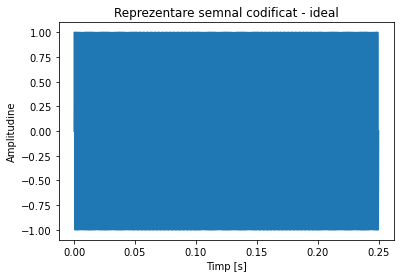

In [60]:
# Afisare semnal codificat, ideal

plt.figure()
plt.plot(t, x)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Reprezentare semnal codificat - ideal')

In [61]:
# Inregistrare semnal
rec = sd.playrec(x, 44100, channels=2)

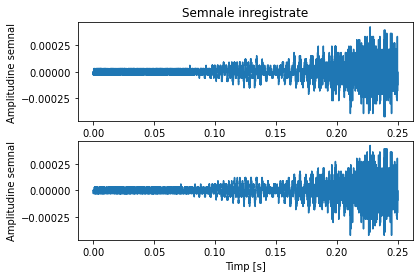

In [62]:
# Afisare semnale inregistrate
showRecordedSignal(rec, t)

In [63]:
Fs = 44100 # Hz
bits_decoded = decodeBitsFromFreq(signal = rec[:,0], duration = duration, Fp_l = Fp_l, Fp_h = Fp_h )
print('Biti trimisi:      {}\nBiti receptionati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))

Dimensiune = 2205
Biti trimisi:      01010
Biti receptionati: 10001
Eroarea este 80.0 %


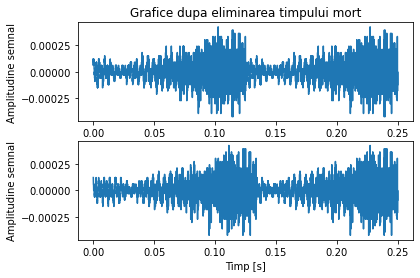

In [64]:
# Eliminare timp mort
rec_copy = rec;
rec_copy[:, 0] = removeDeadTime(rec[:, 0])
rec_copy[:, 1] = removeDeadTime(rec[:, 1])
showRecordedSignal(rec_copy, t, 'Timp [s]', 'Amplitudine semnal', 'Grafice dupa eliminarea timpului mort')


In [65]:
# Decodificare dupa eliminarea timpului mort
Fs = 44100;
bits_decoded = decodeBitsFromFreq(signal = rec_copy[:,0],duration = duration, Fp_l = Fp_l, Fp_h = Fp_h )
print('Biti trimisi:      {}\nBiti receptionati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))

Dimensiune = 2205
Biti trimisi:      01010
Biti receptionati: 00101
Eroarea este 80.0 %


<h1> Testare transmisie cu introducerea unui header pentru contracararea fenomenului de timp mort </h1>

<p></p>

In [66]:


# Durata, frecventele, precum si sirul de biti au fost initializate la inceputul metodei II de 
# codare si recuperare a semnalului
dead_time = 0.3
Fs = 44100
x, t = codeBits2FreqWithDeadTime(bits = bits_to_send, duration = duration,
                                 dead_time = dead_time, Fp_l = Fp_l, Fp_h = Fp_h)

# Eliminare header
x_removed_deadtime = removeHeader(signal = x, header_duration = dead_time, Fs = Fs)
t_removed_deadtime = np.linspace(0, duration * len(bits_to_send), np.prod(x_removed_deadtime.shape))

# Decodificare
bits_decoded = decodeBitsFromFreq(signal = x_removed_deadtime, duration = duration, Fp_l = Fp_l, Fp_h = Fp_h)

print('Biti trimisi:      {}\nBiti decodificati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))


Dimensiune = 2205
Biti trimisi:      01010
Biti decodificati: 01010
Eroarea este 0.0 %


In [68]:
# Inregistrare semnal
rec = sd.playrec(x, 44100, channels=2) 

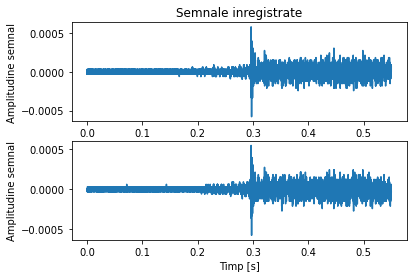

In [69]:
# Afisare semnal inregistrat
showRecordedSignal(rec, t, 'Timp [s]', 'Amplitudine semnal')

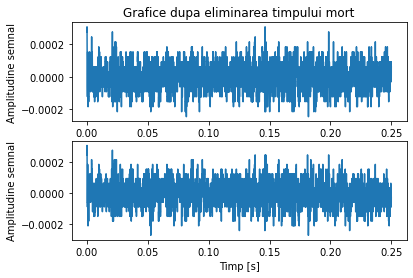

In [70]:

# Eliminare header
channel_1_wh = removeHeader(signal = rec[:, 0], header_duration = dead_time, Fs = Fs)
channel_2_wh = removeHeader(signal = rec[:, 1], header_duration = dead_time, Fs = Fs)

rec_copy = np.ones((len(channel_1_wh), 2))
rec_copy[:, 0] = removeDeadTime(channel_1_wh)
rec_copy[:, 1] = removeDeadTime(channel_2_wh)

t = np.linspace(0, len(bits_to_send) * duration, np.prod(rec_copy[:, 1].shape))
showRecordedSignal(rec_copy, t, 'Timp [s]', 'Amplitudine semnal', 'Grafice dupa eliminarea timpului mort')


In [71]:
# Decodificare
bits_decoded = decodeBitsFromFreq(signal = rec_copy[:, 0], duration = duration, Fp_l = Fp_l, Fp_h = Fp_h)

print('Biti trimisi:      {}\nBiti decodificati: {}'.format(bits_to_send, bits_decoded))
print('Eroarea este {} %'.format(computeError(bits_to_send, bits_decoded)))

Dimensiune = 2205
Biti trimisi:      01010
Biti decodificati: 11100
Eroarea este 60.0 %


<h2> Probleme:</h2>

<ol>
        <li>Am incercat sa eliminam timpul mort, doar ca in unele cazuri apare la inceputul semnalului o zona in care valoarea semnalului este nenula si stric mai mare in modul decat pragul setat pentru timpul mort. Nu am mai stat sa rezolvam si aceasta problema, ar fi fost overkill din punctul nostru de vedere avand in vedere scopul laboratorului.</li>  
    
</ol>
<br>
     <b> Honorable mentions</b>: Initial, am setat o valoare mult prea mare pentru amplitudinile semnalelor trimise, in cazul transferului de date prin amplitudinea semnalului, iar pentru evitarea saturatiei placii de sunet am dezactivat "sound enhancements" din setarile Windows-ului.

<h1> Concluzii</h1>

<h3> Generale: </h3>

<ol>
  <li> Viteza de transfer depinde de frecventa semnalului "purtator", daca alegem un semnal de frecventa 1Hz nu vom putea avea o durata a unui impuls mai mica de o secunda. Pe masura ce crestem frecventa scadem numarul de esantioane per perioada a semnalului transmis si astfel reprezentarea nu mai este una foarte exacta.</li>
  <li> Odata cu cresterea vitezei de transfer (in cod setam duration suficient de mic, dar astfel incat sa respecte urmatoarea conditie elementara, duration > 1/F_max, unde F_max este frecventa maxima din semnalul nostru) vom avea probleme datorita timpului mort indus de catre placa de sunet. O varianta prin care putem sa eliminam aceasta problema este sa introducem un header care sa fie reprezentat de valori 0 pe o durata gasita empiric (prin vizualizarea graficelor) in jur de 0.3 - 0.5 secunde.</li>

</ol>

<h3> Codificare in amplitudine: </h3>

<ol>
    <li>In cazul codificarii informatiei prin amplitudine intampinam probleme din cauza fenomenului de saturatie suferit de catre placa de sunet si prin urmare trebuie sa trimitem semnale a caror amplitudine sa nu satureze placa de sunet.</li>

</ol>

<h3> Codificare in frecventa: </h3>

<ol>
    <li> In acest caz fiecare bit este codificat astfel: 0 - Fp_l = 10000 (dar se poate modifica in cod sa fie orice frecventa in range-ul 20 Hz - 22000 Hz), 1 - Fp_h = 12000 (dar se poate modifica in cod sa fie orice frecventa in range-ul 20 Hz - 22000 Hz).</li>
    <li> Varianta cu introducerea unui header are cea mai mare eficienta, pentru ca ne ajuta sa reducem atat timpul mort, cat si pentru a ignora eventualele spike-uri ce pot aparea in primele fractiuni de secunda.</li>
    
</ol>
